## Data Visualization | Canada Immigration Data 1980 -2013 | Waffle Charts and Regression Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
from PIL import Image
import wordcloud

In [2]:
df = pd.read_csv("02 Canada Immigration Clean Data.csv")
print("Data successfully  Imported!")

Data successfully  Imported!


In [3]:
df.head(2)

,Unnamed: 0,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [4]:
df.drop("Unnamed: 0", axis =1, inplace =True)
df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [5]:
df.set_index('Country', inplace =True)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


## Waffle Charts <a id="3"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

Let's revisit the previous case study about Denmark, Norway, and Sweden.



In [6]:
df_dns = df.loc[['Denmark', 'Norway', 'Sweden']]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Unfortunately, unlike R, `waffle` charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.

Let's create a function called *create_waffle_chart*. This function would take the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


In [7]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Now to create a `waffle` chart, all we only have to do is call the function `create_waffle_chart`. Let's define the input parameters:

In [8]:
width = 30
height = 20

categories = df_dns.index.values # it will extact the country names
values = df_dns['Total']
colormap = plt.cm.coolwarm

Total number of tiles is 600


C:\Users\lovis\AppData\Local\Temp\ipykernel_52572\3325979997.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\lovis\AppData\Local\Temp\ipykernel_52572\3325979997.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
C:\Users\lovis\AppData\Local\Temp\ipykernel_52572\3325979997.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

<Figure size 640x480 with 0 Axes>

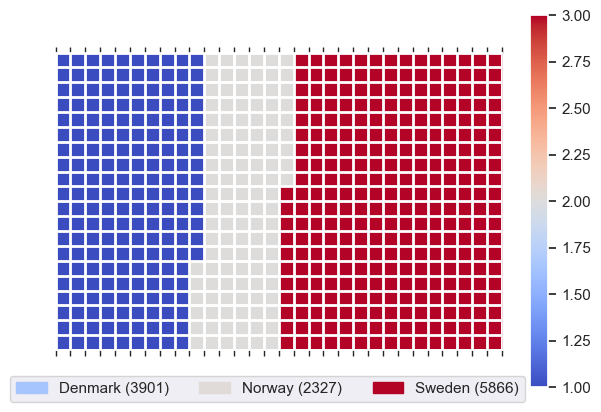

In [9]:
create_waffle_chart(categories, values, height, width, colormap)

There seems to be a new Python package for generating `waffle charts` called [PyWaffle](https://github.com/ligyxy/PyWaffle), <br><br>Let's create the same waffle chart with **pywaffle** now.


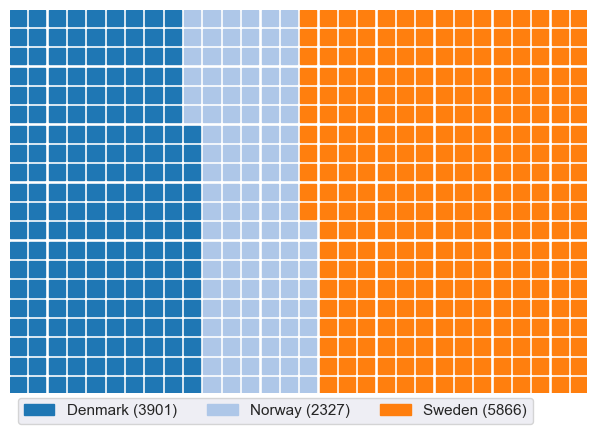

In [10]:
from pywaffle import Waffle

#set up the waffle chart figure
fig = plt.figure(FigureClass= Waffle, 
                 rows =20, columns =30,
                 values =df_dns['Total'],
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dns.index.values,df_dns.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3})

plt.show()

Let's find out the top 5 countries contributing the most in Immigration.

In [11]:
df.sort_values(by ='Total', ascending =False, axis = 0, inplace =True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


Now let's create a Waffle chart to dispaly the proportiona of Inida and Pakistan total immigrant contribution.

In [12]:
df_ip = df.loc[['India', 'Pakistan'],:]
df_ip

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


`Example 1:` Using our create_waffle_chart_function()

In [13]:
width = 30
height =20
categories = df_ip.index.values
values = df_ip['Total']
colormap = plt.cm.coolwarm

Total number of tiles is 600


C:\Users\lovis\AppData\Local\Temp\ipykernel_52572\3325979997.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\lovis\AppData\Local\Temp\ipykernel_52572\3325979997.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
C:\Users\lovis\AppData\Local\Temp\ipykernel_52572\3325979997.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

<Figure size 640x480 with 0 Axes>

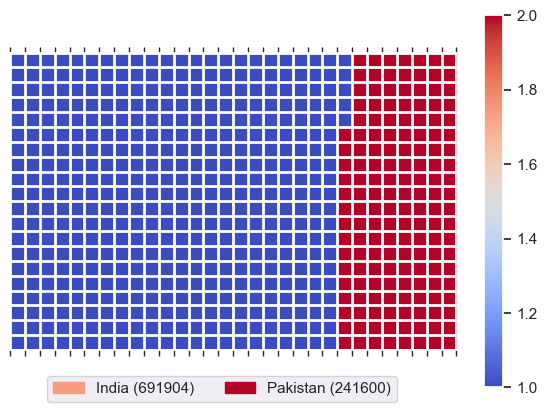

In [14]:
create_waffle_chart(categories, values, height, width, colormap)

`Example 1:` Using pywaffle

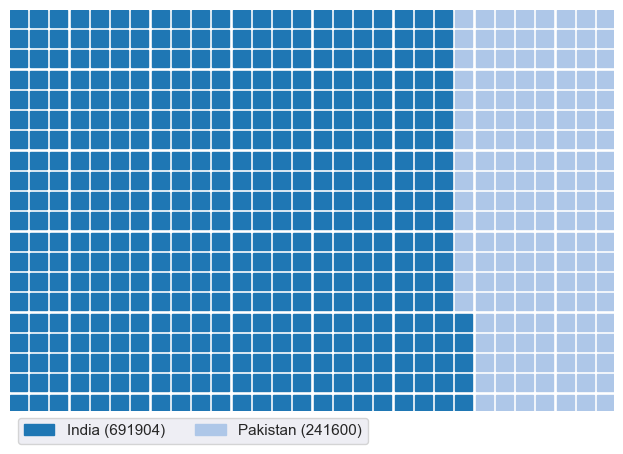

In [15]:
fig = plt.figure(FigureClass= Waffle,
                 rows =20,
                 columns =30,
                 values = df_ip['Total'],
                 cmap_name ='tab20',
                 legend= {'labels': [f"{k} ({v})" for k, v in zip(df_ip.index.values,df_ip.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 )

plt.show()

## Plotting with Seaborn <a id="5"></a>

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

### Categorical Plots

> `Countplot`<br>
**A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.**
Let's find the count of Continents in the data 'df_can' using countplot on 'Continent'

In [16]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Northern America',
       'Latin America and the Caribbean', 'Africa', 'Oceania'],
      dtype=object)

In [19]:
df = df.replace('Latin America and the Caribbean', 'L-America')
df = df.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

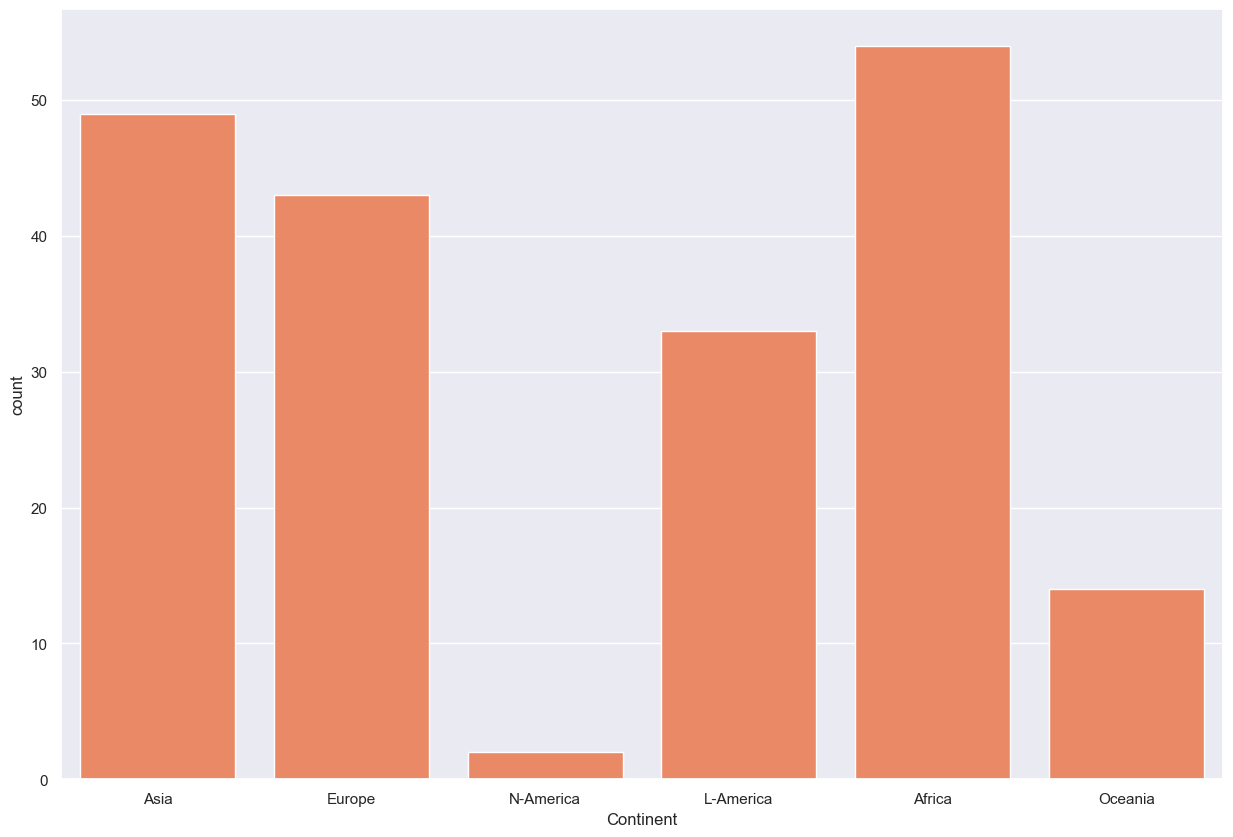

In [24]:
plt.figure(figsize = (15,10))
sns.countplot(x ='Continent', data =df, color ='coral')

### Barplot
**This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidence intervals**.<br> Let's plot the total immigrants Continent-wise


<Axes: xlabel='Continent', ylabel='Total'>

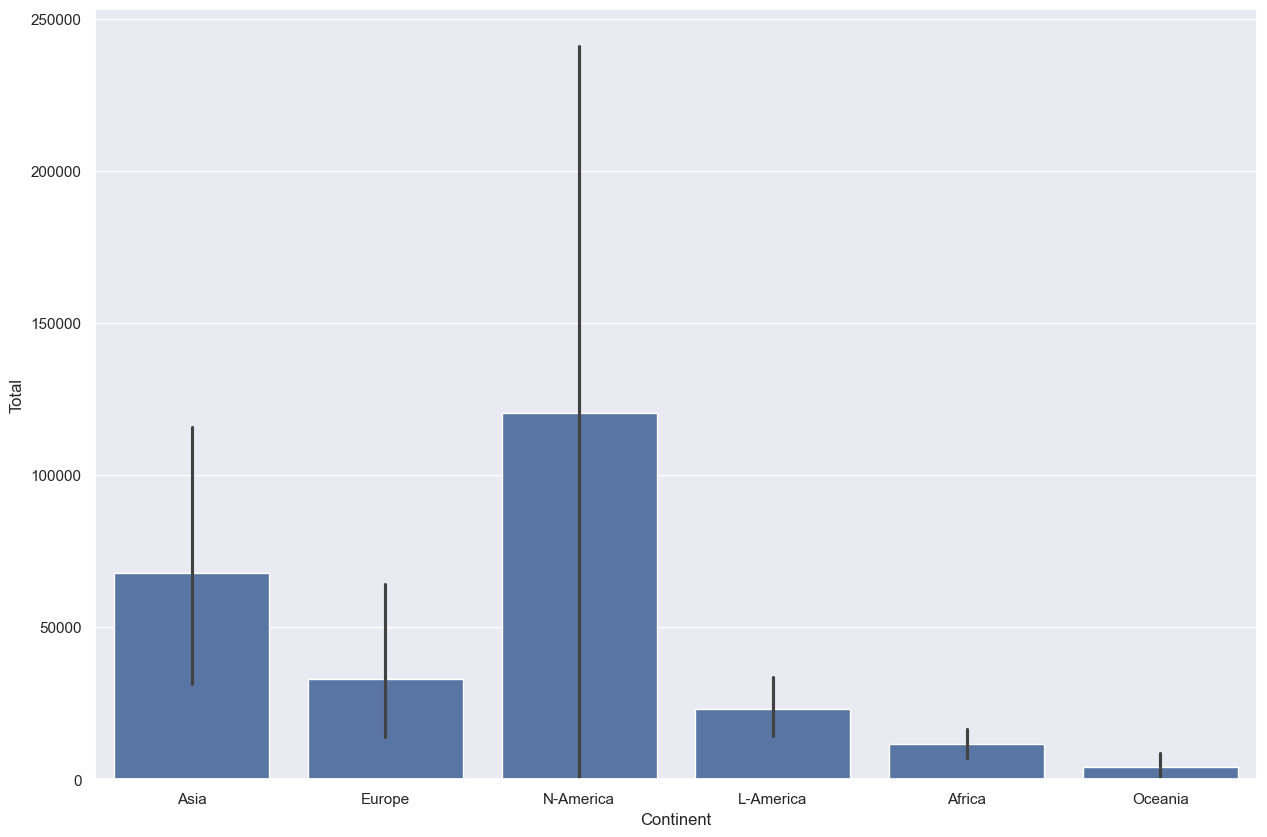

In [25]:
plt.figure(figsize=(15, 10))
sns.barplot(x ='Continent', y ='Total', data =df)

Let's verify the values by performing the groupby on the Total and Continent for mean()

In [26]:
df_2 = df.groupby('Continent')['Total'].mean()
df_2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

## Regression Plot <a id="6"></a>
With *seaborn*, generating a regression plot is as simple as calling the **regplot** function.


First create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.


In [29]:
years = list(map(str, range(1980, 2014)))

df_tot = pd.DataFrame(df[years].sum(axis =0))
#  change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace =True)

#rename columns
df_tot.columns = ['years', 'total']
df_tot.head()

,years,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


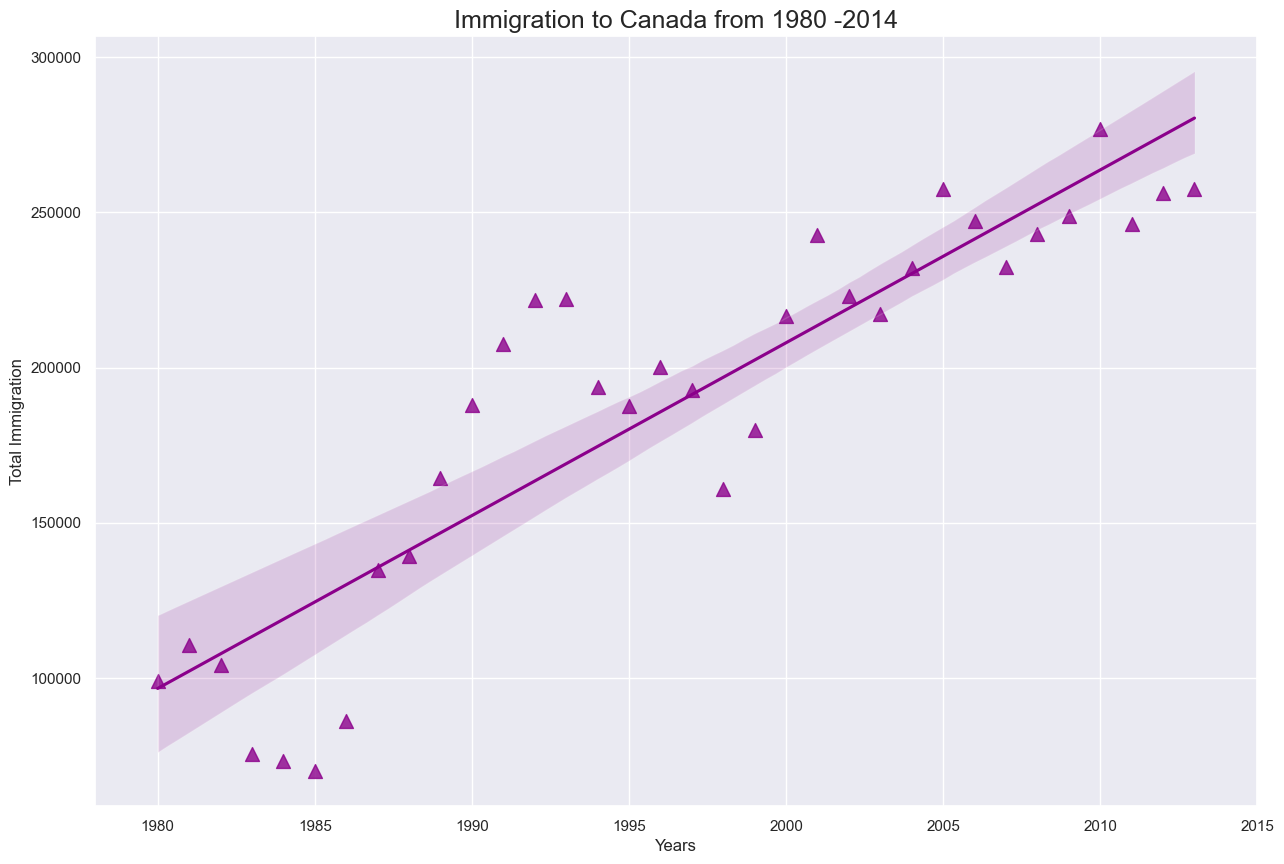

In [43]:
plt.figure(figsize =(15,10))
ax =sns.regplot(x= 'years', y ='total', data =df_tot, 
            color ='darkmagenta',
            marker= '^', scatter_kws ={'s': 100})
ax.set_title("Immigration to Canada from 1980 -2014", fontsize =18)
ax.set(xlabel ='Years', ylabel ='Total Immigration')
plt.xlim(1978,2015)
plt.show()

Let's use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.


In [44]:
df_dns.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [46]:
df_dns_tot =pd.DataFrame(df_dns[years].sum(axis=0))
df_dns_tot.index = map(float, df_dns_tot.index)
df_dns_tot.reset_index(inplace =True)
df_dns_tot.columns =['years', 'total']
df_dns_tot.head()

,years,total
0,1980.0,669
1,1981.0,678
2,1982.0,627
3,1983.0,333
4,1984.0,252


Let's plot the total immigration from Denmark, Sweden and Norway. 

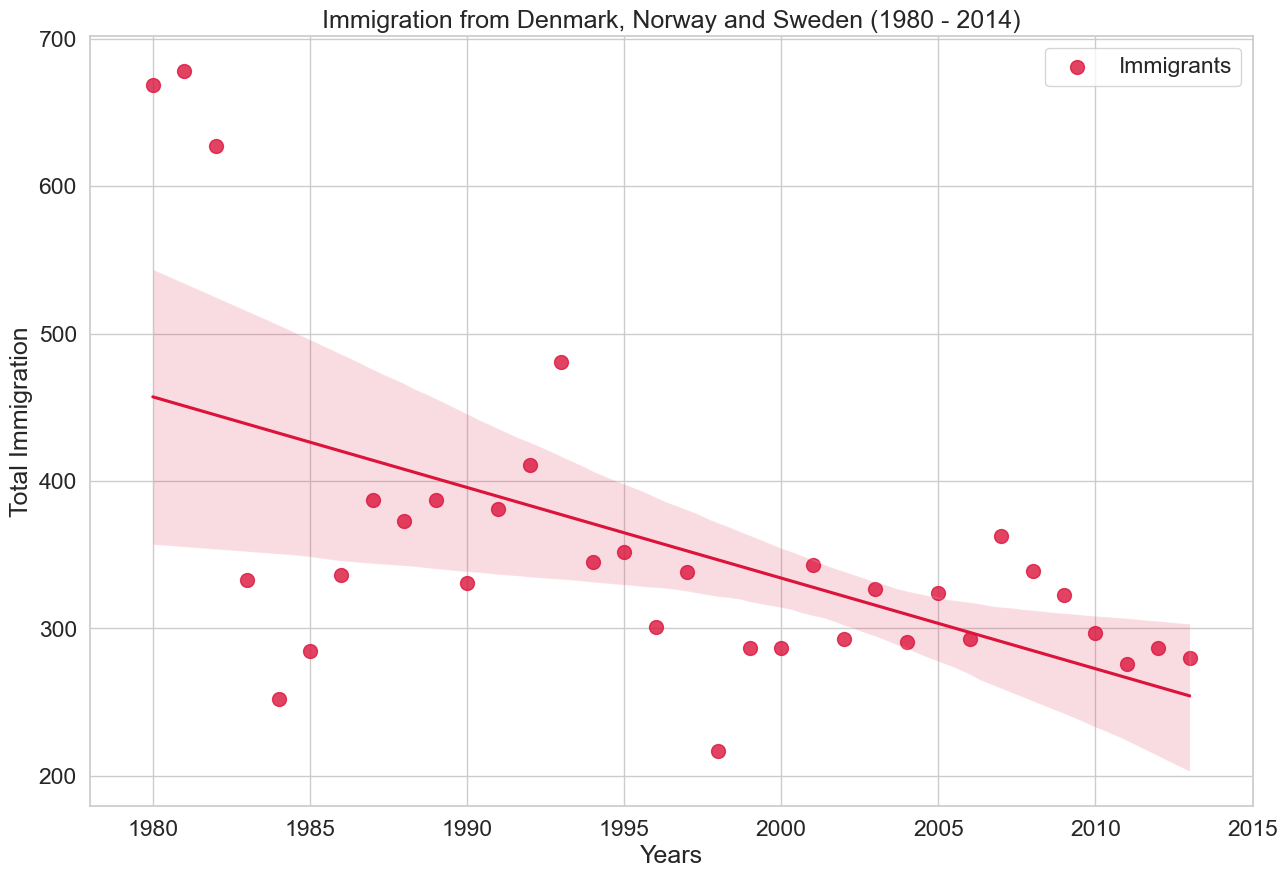

In [59]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid') # removes the grey background
ax = sns.regplot(x ='years', y ='total', data =df_dns_tot,
                 color ='crimson',
                 marker = 'o', scatter_kws={'s':100})

ax.set_title("Immigration from Denmark, Norway and Sweden (1980 - 2014)", fontsize =18)
ax.set(xlabel= 'Years', ylabel= 'Total Immigration')

plt.xlim(1978, 2015)
plt.legend(['Immigrants'])
plt.show()

## <h3 align="center"> Data Visualization by Lovish Garlani | Copyright IBM <h3/>